# Semiconductor Manufacturing 

### Initialization

In [210]:

# Basic packages
import numpy as np
import pandas as pd

# visualization packages
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px

# model packages
from sklearn.model_selection import train_test_split
from imblearn.datasets import make_imbalance
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


### Data Understanding

In [211]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"
secom = pd.read_table(url, header=None, delim_whitespace=True)

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"
labels = pd.read_table(url, header=None, usecols=[0], squeeze=True, delim_whitespace=True)

C:\Users\ZhitingDu\AppData\Local\Temp\ipykernel_17736\710052082.py:5: FutureWarning:

The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.





In [212]:
# rename the labels before merge
labels_df = pd.DataFrame({'Result': labels.values})
print(labels_df)

      Result
0         -1
1         -1
2          1
3         -1
4         -1
...      ...
1562      -1
1563      -1
1564      -1
1565      -1
1566      -1

[1567 rows x 1 columns]


In [213]:
# rename the features name to feature1, feature2...using functions
secom = secom.add_prefix('Feature-_')
secom

,Feature-_0,Feature-_1,Feature-_2,Feature-_3,Feature-_4,Feature-_5,Feature-_6,Feature-_7,Feature-_8,Feature-_9,...,Feature-_580,Feature-_581,Feature-_582,Feature-_583,Feature-_584,Feature-_585,Feature-_586,Feature-_587,Feature-_588,Feature-_589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [214]:
# merge secom and lables, https://data-science-blog.com/en/blog/tag/secom/
secom_merged = pd.merge(secom, labels_df,left_index=True,right_index=True)

In [215]:
secom_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, Feature-_0 to Result
dtypes: float64(590), int64(1)
memory usage: 7.1 MB


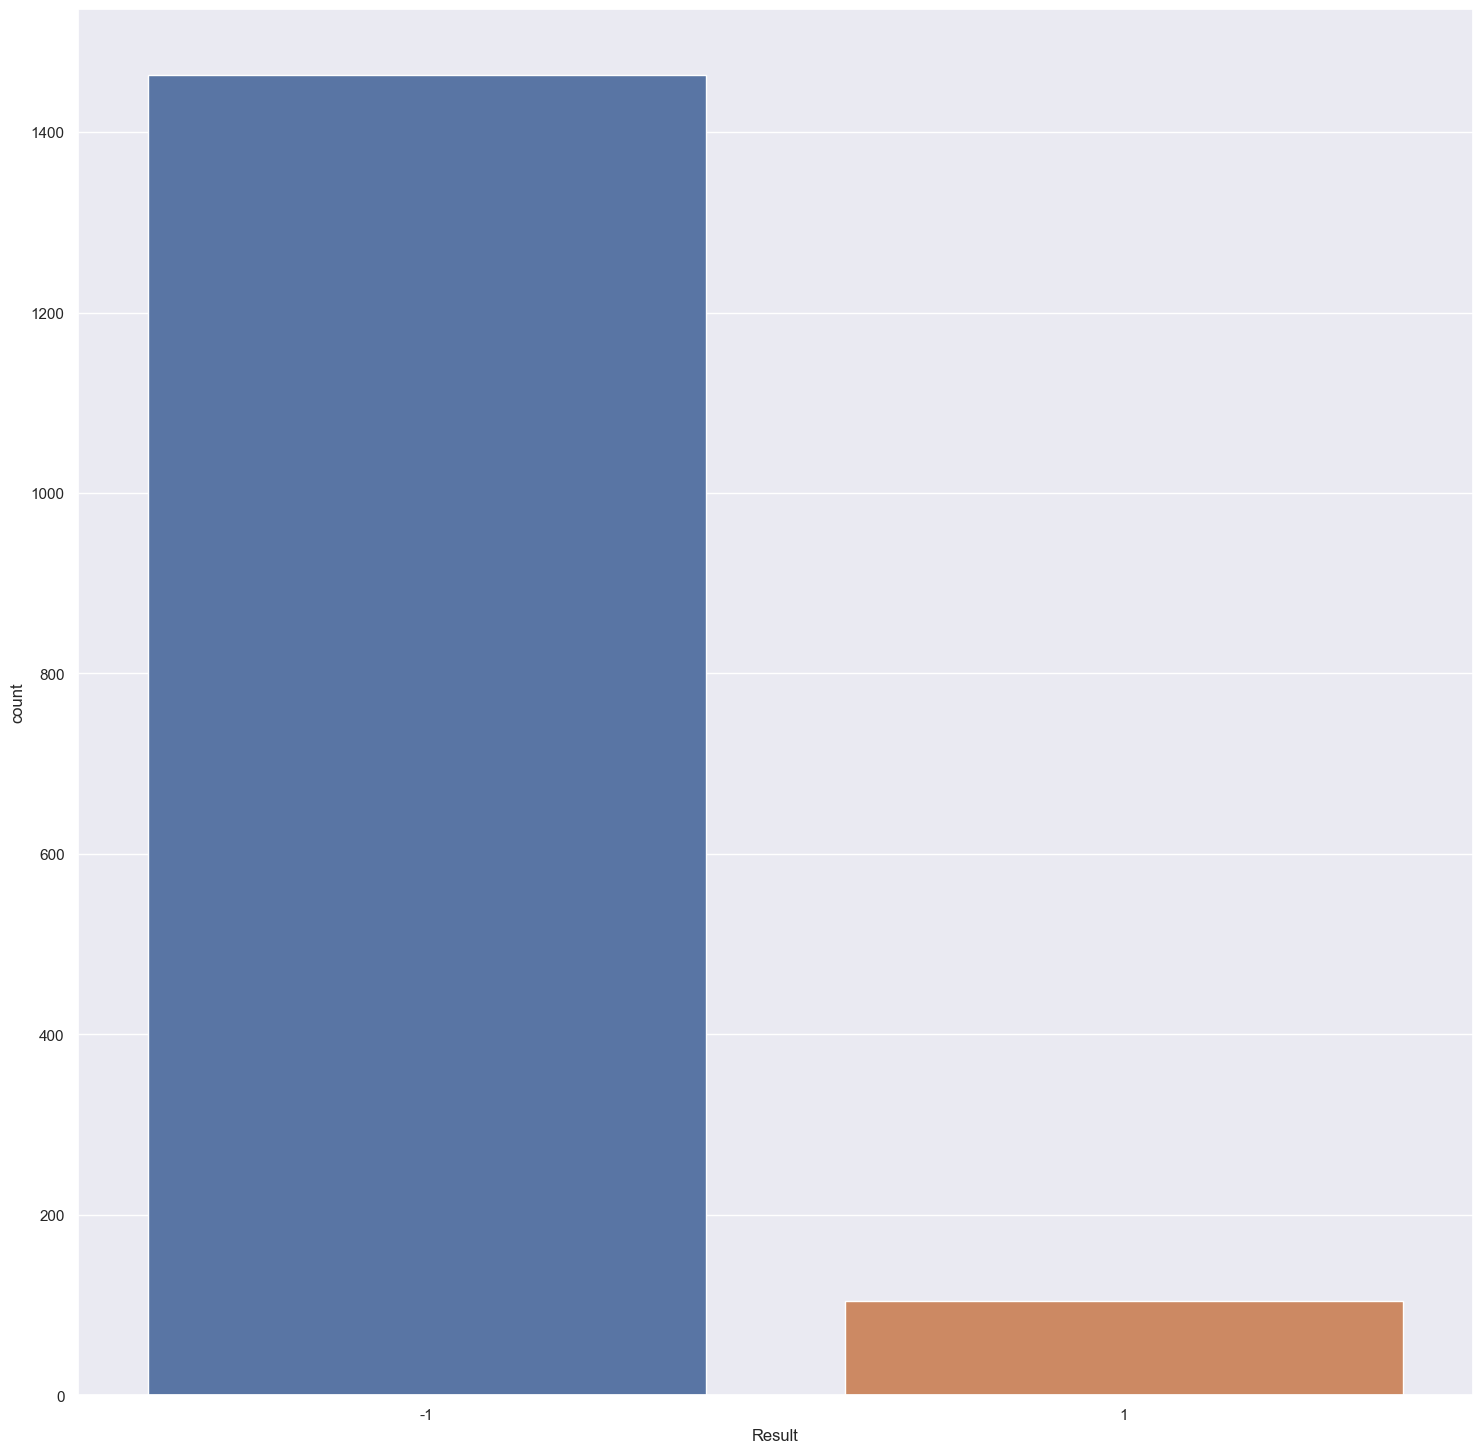

In [216]:
# frequency distribution of target values in bar
# imbalanced datasets 
sns.set(style="darkgrid")
ax = sns.countplot(x = "Result", data = secom_merged)

1567 examples, more than 1400 explames are "-1"which means pass, 104 examples are "1" as not pass. So here i use ML-logistic regression to deal with. If we consider pass and fail as two classes, then there are huge imbalance between these two classes. 

In [217]:
# histogram of percentage of missing values of features, 
# https://www.kaggle.com/code/mohitkumar409/semiconductor-manufacturing-process

df=secom.isna().sum()*100/secom_merged.shape[0]
fig = px.line(x=df.index, y=df,title="Percentage of missing values in all the features, data=secom_merged"
              )
fig.update_xaxes(title_text= 'Features')
fig.update_yaxes(title_text= 'Percentage of Missing values',range=[0,100])
fig.show()

There are measures have high percentage of missing data, which will be anaylzed later on in the training data.

## Data Cleansing, Imputation and Scaling Methods 

In [218]:
# Volatility of features
# check the numbner of missing values of 590 sensor measurements
secom.isnull().sum()

Feature-_0       6
Feature-_1       7
Feature-_2      14
Feature-_3      14
Feature-_4      14
                ..
Feature-_585     1
Feature-_586     1
Feature-_587     1
Feature-_588     1
Feature-_589     1
Length: 590, dtype: int64

Text(0.5, 1.0, 'Pair-wise Correlation heatmap for the Data')

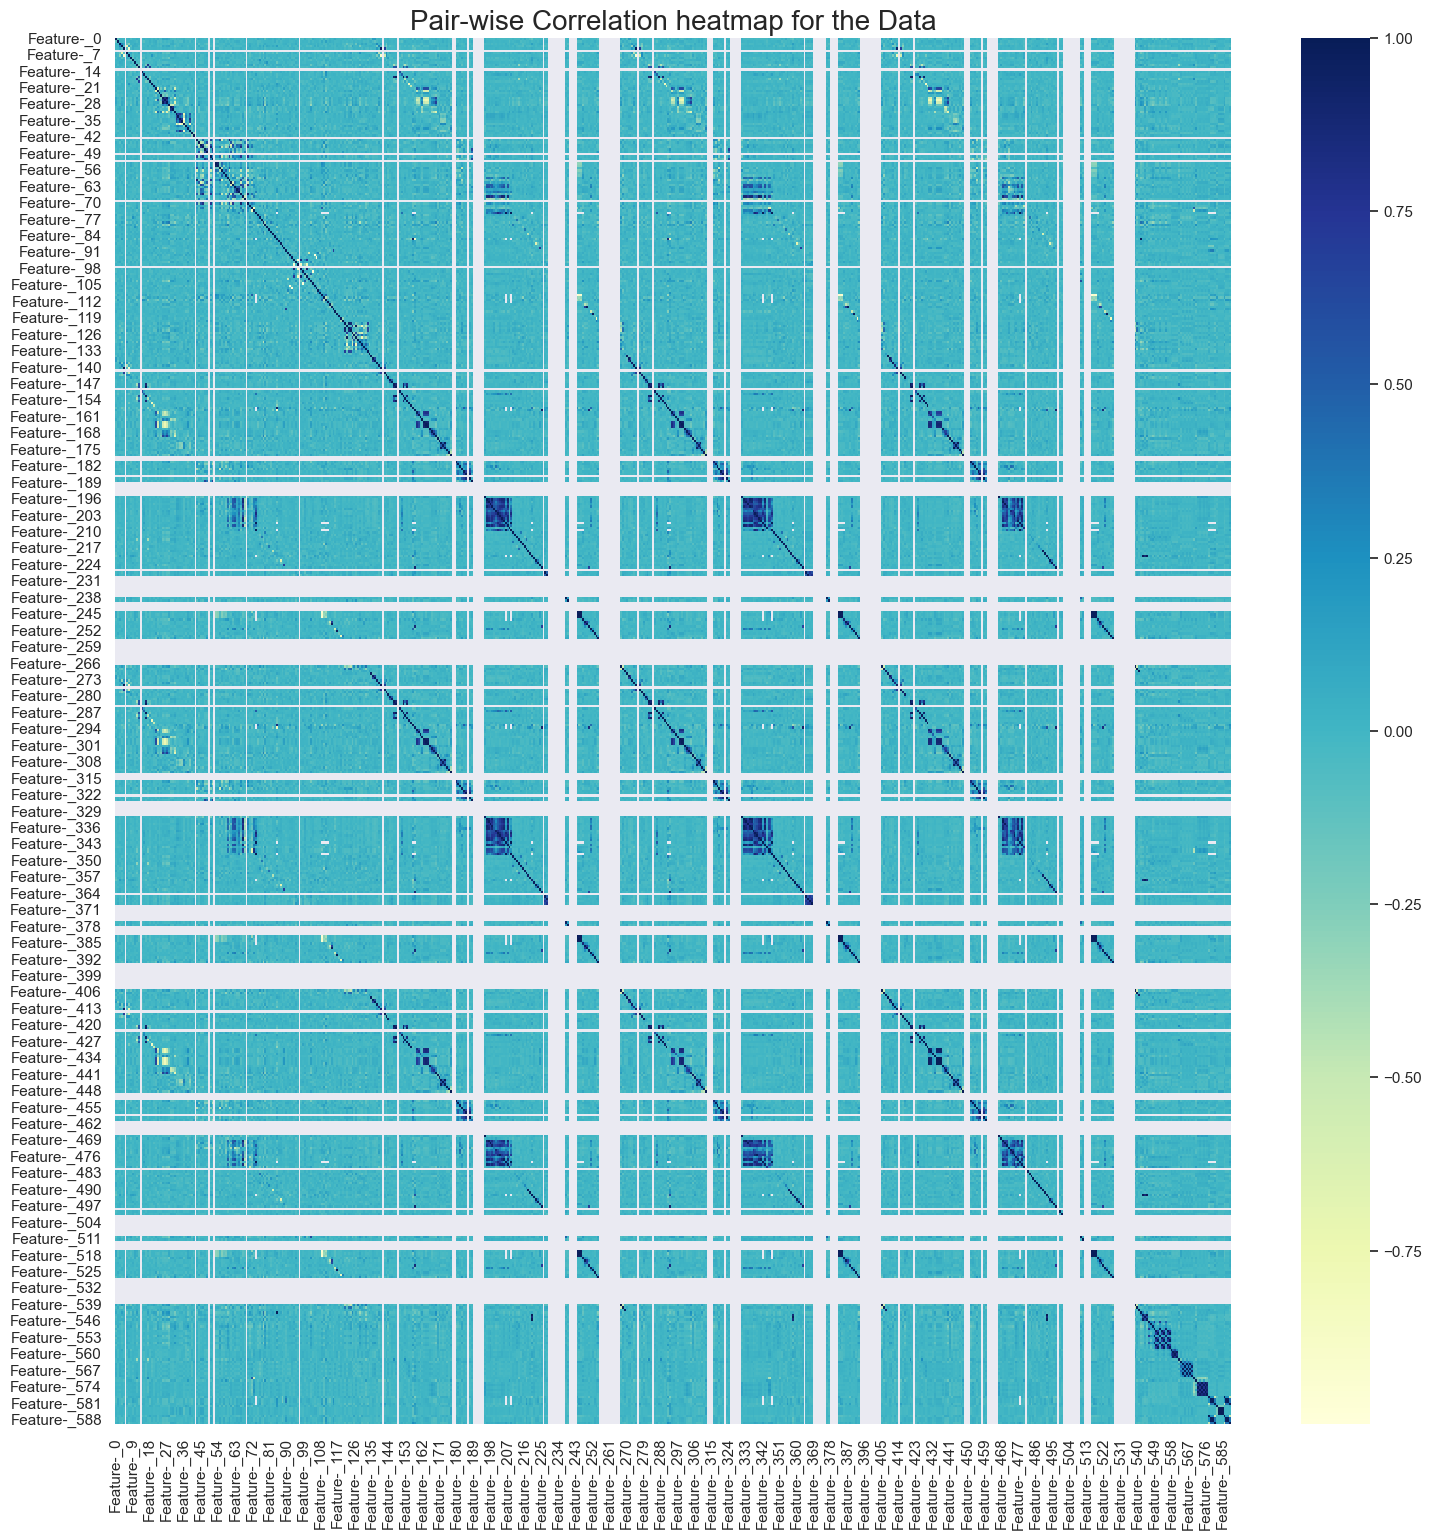

In [219]:
# Pair-wise correlation heatmap, https://www.kaggle.com/code/saurabhbagchi/fmst-semiconductor-manufacturing-project
# heatmap to get correlation

plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(secom.corr(), cmap = "YlGnBu")
plt.title('Pair-wise Correlation heatmap for the Data', fontsize = 20)

### Duplicate and missing value check, reduce the columns having high missing values

In [220]:
# duplicate identification
if secom.duplicated().any():
    print("Duplicate rows found")
else:
    print("No duplicate rows found")

No duplicate rows found


In [221]:
#missing value analysis, histogram, threshold defintion

df=secom.isna().sum().sort_values(ascending=False)
fig = px.bar(x=df.index, 
             y = df, 
             title='Count of missing values per feature , data="secom"',
             text = round(df,1), color=df)
fig.update_xaxes(title_text='Features with missing value (sorted)',type='category')
fig.update_yaxes(title_text='Count of missing values')
fig.show()

In [222]:
#missing value analysis in training data, histogram, threshold defintion
df=secom.isna().sum()*100/secom_merged.shape[0]
df = df[df>55].sort_values(ascending=False)
fig = px.bar(x=df.index, 
             y = df, 
             title='Percentage of missing values per feature (with >55% NaNs), data="secom"',
             text = round(df,1), color=df)
fig.update_xaxes(title_text='Features with more than 55% missing value (sorted)',type='category')
fig.update_yaxes(title_text='Percentage of missing values')
fig.show()

In [223]:
#missing value imputation method, reduce the unneed features
# there are 24 columns have more than 55% missing values, in this case will be removed
secom_na=secom_merged.isna().sum()*100/secom.shape[0]
secom_na = df[df>55]
secom_na.shape

(24,)

In [224]:
#missing value imputation method, reduce the unneed features,after 566 features left
# https://www.kaggle.com/code/kirshoff/secom-dataset-analysis
secom = secom.drop(axis=1, columns=secom_na.index)
secom.shape


(1567, 566)

566 Features left, after reducing the columns having high percentage of NA

In [225]:
# missing value imputation method
# fill the data of the columns having less missing valeus percentage
#strategy : latest information available
secom.fillna(method='ffill', inplace=True)
secom.fillna(method='bfill', inplace=True)
secom

,Feature-_0,Feature-_1,Feature-_2,Feature-_3,Feature-_4,Feature-_5,Feature-_6,Feature-_7,Feature-_8,Feature-_9,...,Feature-_576,Feature-_577,Feature-_582,Feature-_583,Feature-_584,Feature-_585,Feature-_586,Feature-_587,Feature-_588,Feature-_589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.0096,0.0201,0.0060,208.2045
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,1.4879,11.7256,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,1.0187,17.8379,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4333,-0.0061,...,1.2237,17.7267,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,1.7085,19.2104,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [226]:
# check the result,good, no null values
secom.isnull().values.any()

False

### Correlation check, selecting out the features having small corr rate 

In [227]:
# identify important features , reduce the unneed features
# correlation analysis
# https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data
# https://www.kaggle.com/code/kirshoff/secom-dataset-analysis

def remove_collinear_features(x, threshold):

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x





In [228]:
#Remove columns having more than +50% and less than -50% correlation
# 278 columns (features) left
# drop the left related column
secom = remove_collinear_features(secom,0.50)
secom.describe

Feature-_6 | Feature-_3 | 0.69
Feature-_16 | Feature-_12 | 0.55
Feature-_17 | Feature-_11 | 0.79
Feature-_18 | Feature-_12 | 0.69
Feature-_22 | Feature-_21 | 0.73
Feature-_26 | Feature-_22 | 0.53
Feature-_26 | Feature-_25 | 0.82
Feature-_27 | Feature-_25 | 0.98
Feature-_27 | Feature-_26 | 0.79
Feature-_29 | Feature-_28 | 0.52
Feature-_30 | Feature-_28 | 0.58
Feature-_30 | Feature-_29 | 0.86
Feature-_31 | Feature-_21 | 0.6
Feature-_31 | Feature-_25 | 0.62
Feature-_31 | Feature-_27 | 0.65
Feature-_33 | Feature-_32 | 0.67
Feature-_34 | Feature-_32 | 0.75
Feature-_35 | Feature-_32 | 0.51
Feature-_35 | Feature-_34 | 0.77
Feature-_36 | Feature-_32 | 0.75
Feature-_36 | Feature-_34 | 1.0
Feature-_36 | Feature-_35 | 0.77
Feature-_39 | Feature-_32 | 0.53
Feature-_39 | Feature-_34 | 0.8
Feature-_39 | Feature-_35 | 0.58
Feature-_39 | Feature-_36 | 0.8
Feature-_46 | Feature-_45 | 0.81
Feature-_48 | Feature-_44 | 0.59
Feature-_48 | Feature-_45 | 0.53
Feature-_48 | Feature-_47 | 0.64
Feature-_50 | Fe

<bound method NDFrame.describe of       Feature-_0  Feature-_1  Feature-_2  Feature-_3  Feature-_4  Feature-_5  \
0        3030.93     2564.00   2187.7333   1411.1265      1.3602       100.0   
1        3095.78     2465.14   2230.4222   1463.6606      0.8294       100.0   
2        2932.61     2559.94   2186.4111   1698.0172      1.5102       100.0   
3        2988.72     2479.90   2199.0333    909.7926      1.3204       100.0   
4        3032.24     2502.87   2233.3667   1326.5200      1.5334       100.0   
...          ...         ...         ...         ...         ...         ...   
1562     2899.41     2464.36   2179.7333   3085.3781      1.4843       100.0   
1563     3052.31     2522.55   2198.5667   1124.6595      0.8763       100.0   
1564     2978.81     2379.78   2206.3000   1110.4967      0.8236       100.0   
1565     2894.92     2532.01   2177.0333   1183.7287      1.5726       100.0   
1566     2944.92     2450.76   2195.4444   2914.1792      1.5978       100.0   

     

280 Features left after using correlation analysis

Text(0.5, 1.0, 'Pair-wise Correlation < 50% heatmap for the Data')

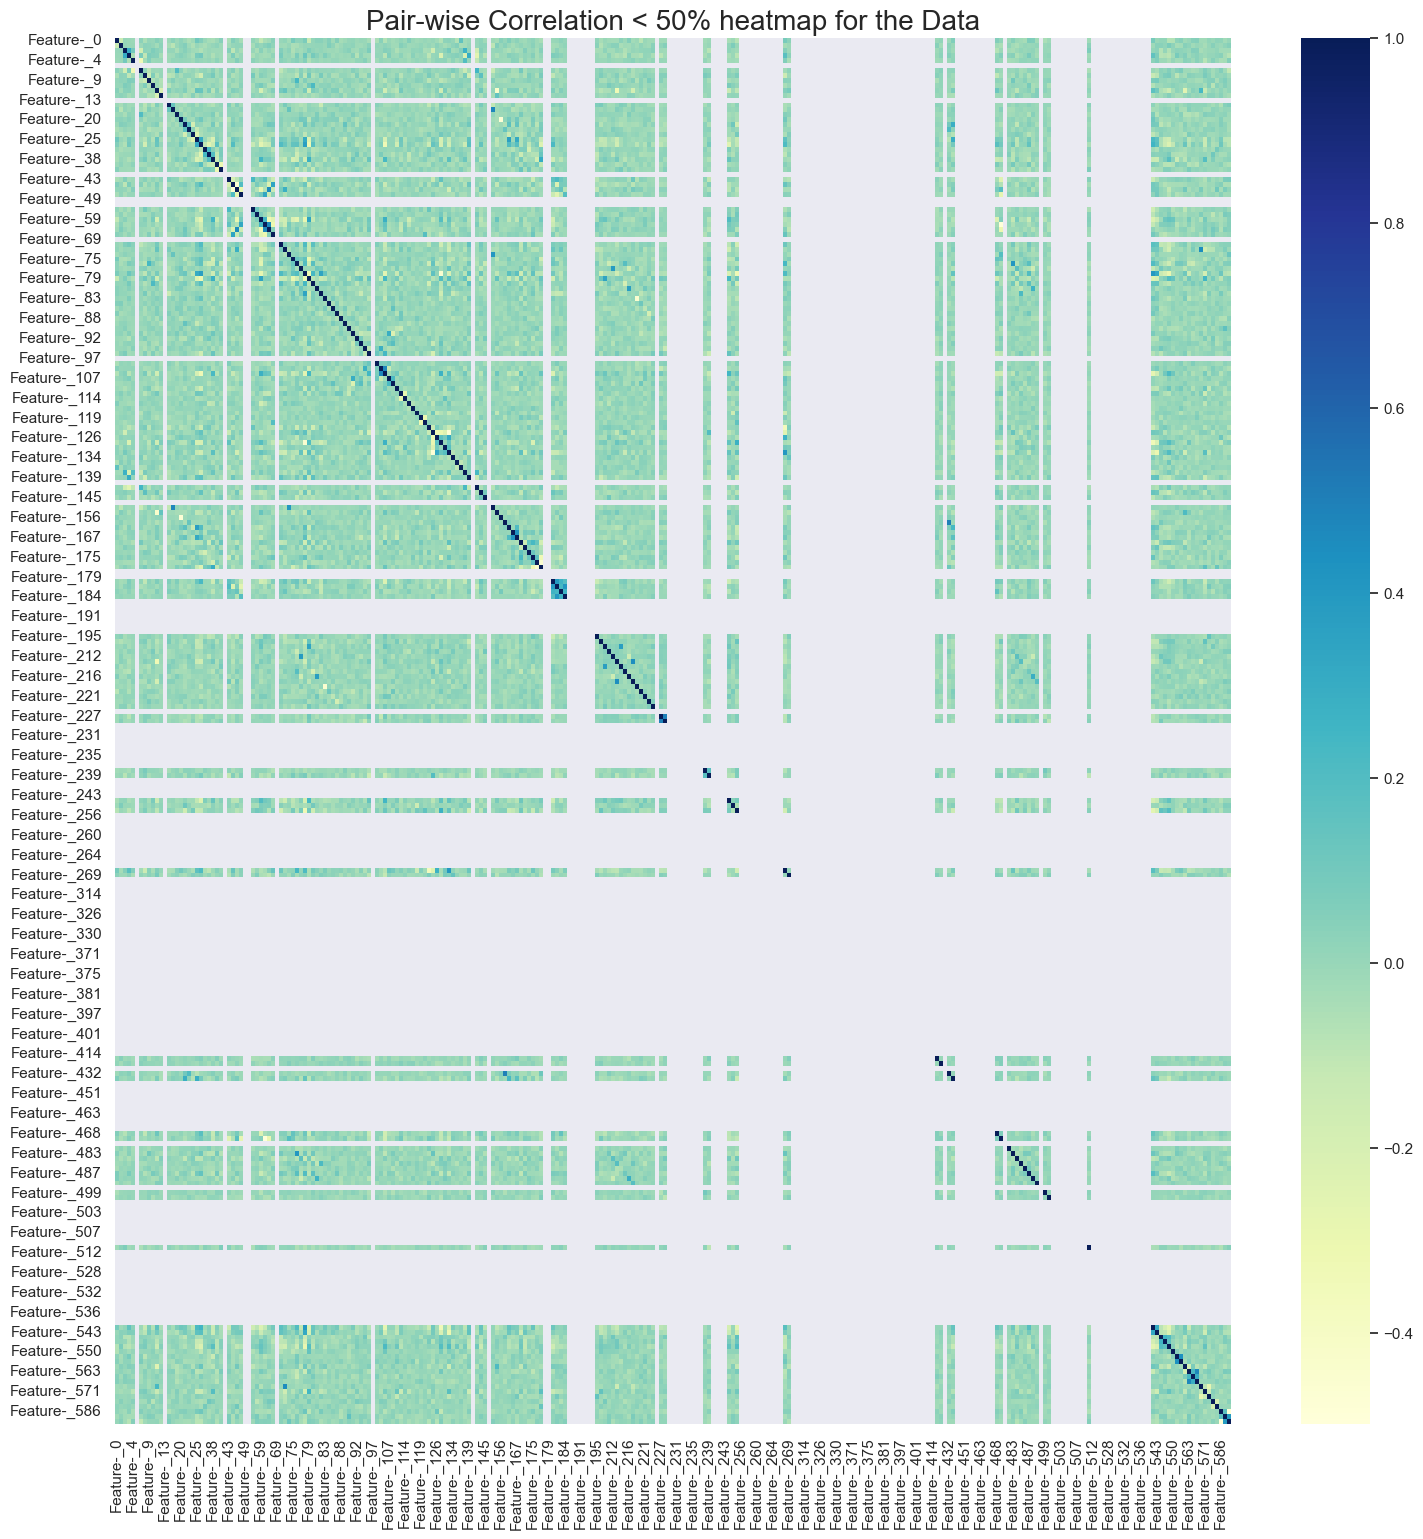

In [229]:
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(secom.corr(), cmap = "YlGnBu")
plt.title('Pair-wise Correlation < 50% heatmap for the Data', fontsize = 20)

### Scaling and variance check

In [230]:
# Histogram of variance
# https://www.kaggle.com/code/mohitkumar409/semiconductor-manufacturing-process
df = pd.cut(secom.var().round(2),[-0.1,0,0.1,0.2,1,10,50,100,500,1000,float('inf')]).value_counts().sort_index()
df.index = df.index.map(str)

fig = px.bar(x=df.index, y=df,title="Before,Variance vs number of features (data: secom)", text = df,color=df)
fig.update_xaxes(title='variance intervals')
fig.update_yaxes(title='Number of features')
fig.show()

More than 170 features have extreme low variance, those will not contribut to the model, following will use scaler and VarianceThreshold to select the needed features

### Scaling the data first

In [231]:
scaler = MinMaxScaler()
scaler.fit(secom)

MinMaxScaler()

In [232]:
secom= scaler.transform(secom)

In [233]:
secom= pd.DataFrame(secom)
secom

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,0.469231,0.589292,0.499096,0.379841,0.000609,0.0,0.965785,0.665019,0.542479,0.358362,...,0.004113,0.899070,0.795609,0.642926,0.011995,0.709375,0.012325,0.221387,0.220339,0.282386
1,0.575003,0.445535,0.666763,0.393982,0.000133,0.0,0.969673,0.656639,0.412315,0.228669,...,0.004113,0.899070,0.799892,0.826067,0.005277,0.753125,0.034637,0.221387,0.220339,0.282386
2,0.308868,0.583388,0.493903,0.457065,0.000744,0.0,0.965008,0.542759,0.448168,0.411832,...,0.004113,0.899070,0.799922,0.596317,0.017006,0.562500,0.020612,0.629073,0.589309,0.112383
3,0.400385,0.466998,0.543479,0.244894,0.000574,0.0,0.946345,0.638590,0.319564,0.359499,...,0.200886,0.210858,0.783557,0.594043,0.012838,0.662500,0.009137,0.309942,0.152542,0.100153
4,0.471367,0.500400,0.678327,0.357067,0.000765,0.0,0.960342,0.670606,0.392050,0.315131,...,0.200886,0.210858,0.788872,0.595294,0.011729,0.068750,1.000000,0.309942,0.152542,0.100153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0.254718,0.444401,0.467675,0.830510,0.000721,0.0,0.970451,0.325312,0.381138,0.332196,...,0.126859,0.097930,0.804759,0.588359,0.009844,0.656250,0.017637,0.197995,0.138201,0.275560
1563,0.504102,0.529017,0.541646,0.302731,0.000175,0.0,0.937014,0.520627,0.368667,0.291240,...,0.113572,0.162567,0.810578,0.682772,0.004301,0.615625,0.015087,0.197995,0.138201,0.275560
1564,0.384221,0.321409,0.572020,0.298919,0.000128,0.0,0.939347,0.520627,0.368667,0.291240,...,0.320152,0.324535,0.782832,0.774910,0.006541,0.653125,0.019762,0.305764,0.070404,0.059030
1565,0.247394,0.542774,0.457071,0.318631,0.000800,0.0,0.943235,0.582725,0.360094,0.433447,...,0.126859,0.097930,0.797605,0.528392,0.012394,0.706250,0.025074,0.360067,0.277705,0.126805


In [234]:
# https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
# https://www.kaggle.com/code/kirshoff/secom-dataset-analysis
pca = PCA().fit(secom)

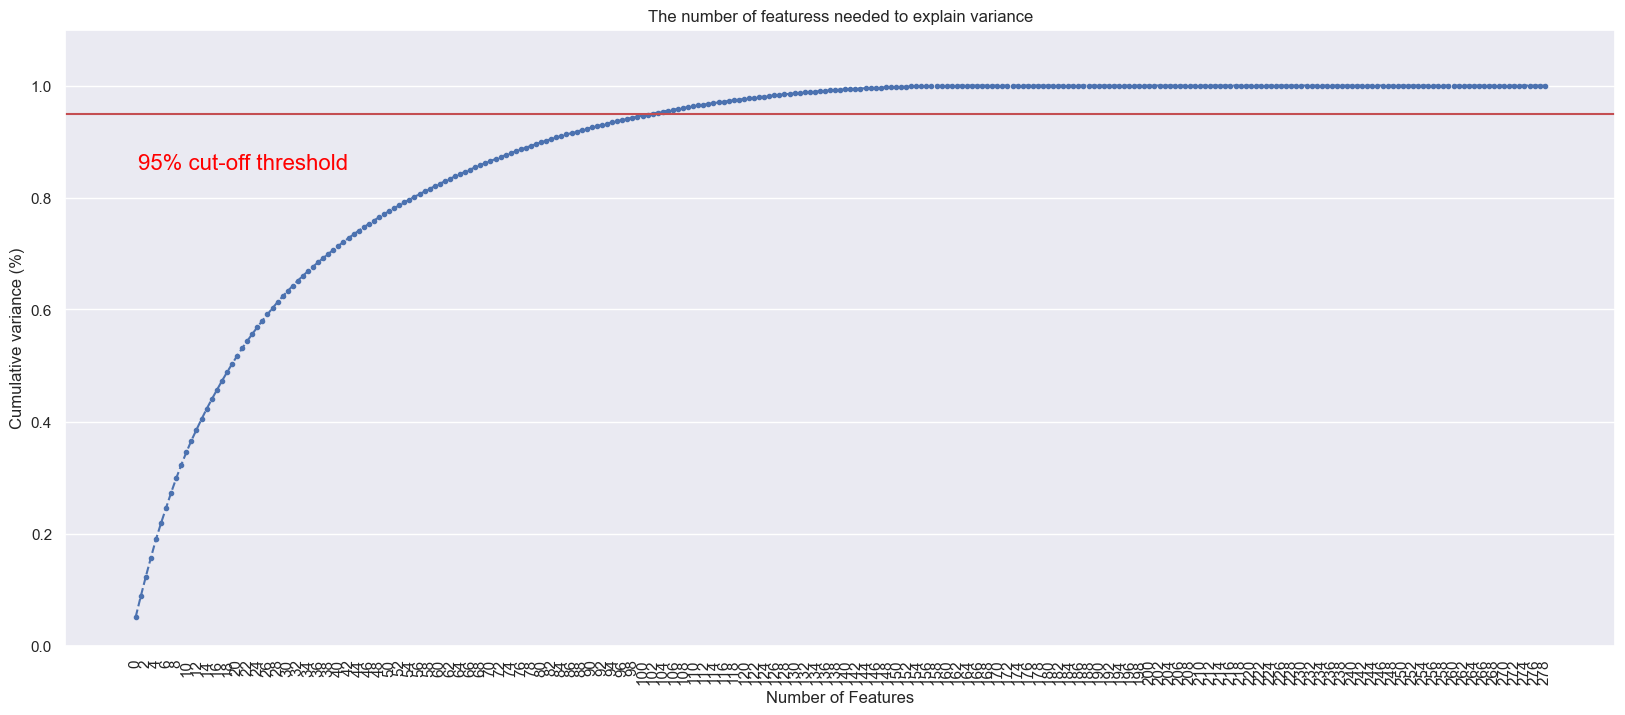

In [235]:
# https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
# https://www.kaggle.com/code/kirshoff/secom-dataset-analysis

fig, ax = plt.subplots(figsize=(20,8))
xi = np.arange(0, 279, step=1)
y = np.cumsum(pca.explained_variance_ratio_[0:279:1])

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='.', linestyle='--', color='b')

plt.xlabel('Number of Features')
plt.xticks(np.arange(0, 279, step=2), rotation=90) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of featuress needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

We want the explained variance to be between 95–99%

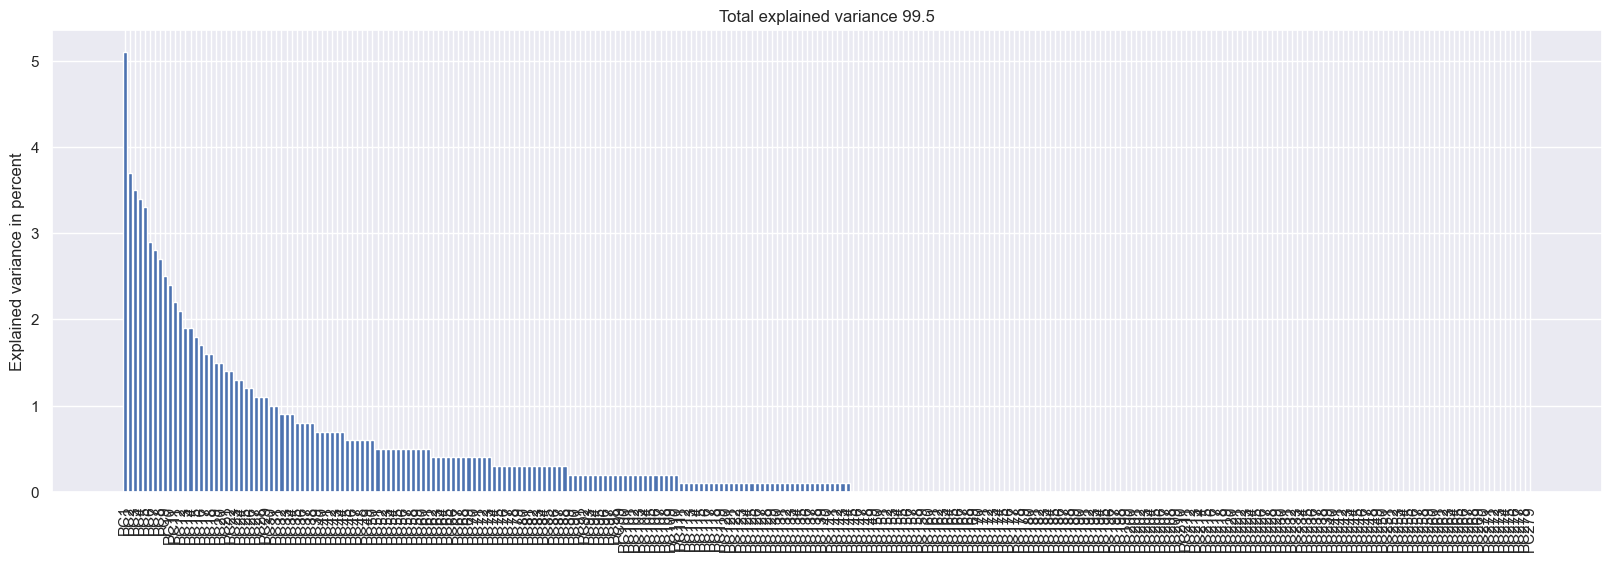

In [236]:

pca.fit(secom)
per_var = np.round(pca.explained_variance_ratio_ * 100, 1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

plt.figure(figsize=(20,6))
plt.bar(x=range(len(per_var)), height=per_var, tick_label=labels)
plt.title('Total explained variance {}'.format(np.round(sum(per_var),2)))
plt.ylabel('Explained variance in percent')
plt.xticks(rotation=90)
plt.show()

In [237]:
selector = VarianceThreshold()
selector.fit(secom)
mask = selector.get_support()
columns = secom.columns
selected_cols = columns[mask]
n_features2 = len(selected_cols)
print(f'remaining features: {n_features2}')

remaining features: 163


In [238]:
secom = pd.DataFrame(selector.transform(secom), columns = selected_cols)
secom

,0,1,2,3,4,6,7,8,9,10,...,269,270,271,272,273,274,275,276,277,278
0,0.469231,0.589292,0.499096,0.379841,0.000609,0.965785,0.665019,0.542479,0.358362,0.880692,...,0.004113,0.899070,0.795609,0.642926,0.011995,0.709375,0.012325,0.221387,0.220339,0.282386
1,0.575003,0.445535,0.666763,0.393982,0.000133,0.969673,0.656639,0.412315,0.228669,0.932908,...,0.004113,0.899070,0.799892,0.826067,0.005277,0.753125,0.034637,0.221387,0.220339,0.282386
2,0.308868,0.583388,0.493903,0.457065,0.000744,0.965008,0.542759,0.448168,0.411832,0.929265,...,0.004113,0.899070,0.799922,0.596317,0.017006,0.562500,0.020612,0.629073,0.589309,0.112383
3,0.400385,0.466998,0.543479,0.244894,0.000574,0.946345,0.638590,0.319564,0.359499,0.933515,...,0.200886,0.210858,0.783557,0.594043,0.012838,0.662500,0.009137,0.309942,0.152542,0.100153
4,0.471367,0.500400,0.678327,0.357067,0.000765,0.960342,0.670606,0.392050,0.315131,0.915301,...,0.200886,0.210858,0.788872,0.595294,0.011729,0.068750,1.000000,0.309942,0.152542,0.100153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0.254718,0.444401,0.467675,0.830510,0.000721,0.970451,0.325312,0.381138,0.332196,0.918336,...,0.126859,0.097930,0.804759,0.588359,0.009844,0.656250,0.017637,0.197995,0.138201,0.275560
1563,0.504102,0.529017,0.541646,0.302731,0.000175,0.937014,0.520627,0.368667,0.291240,0.930176,...,0.113572,0.162567,0.810578,0.682772,0.004301,0.615625,0.015087,0.197995,0.138201,0.275560
1564,0.384221,0.321409,0.572020,0.298919,0.000128,0.939347,0.520627,0.368667,0.291240,0.930176,...,0.320152,0.324535,0.782832,0.774910,0.006541,0.653125,0.019762,0.305764,0.070404,0.059030
1565,0.247394,0.542774,0.457071,0.318631,0.000800,0.943235,0.582725,0.360094,0.433447,0.953248,...,0.126859,0.097930,0.797605,0.528392,0.012394,0.706250,0.025074,0.360067,0.277705,0.126805


In [239]:
secom = secom.add_prefix('Feature-_')
secom

,Feature-_0,Feature-_1,Feature-_2,Feature-_3,Feature-_4,Feature-_6,Feature-_7,Feature-_8,Feature-_9,Feature-_10,...,Feature-_269,Feature-_270,Feature-_271,Feature-_272,Feature-_273,Feature-_274,Feature-_275,Feature-_276,Feature-_277,Feature-_278
0,0.469231,0.589292,0.499096,0.379841,0.000609,0.965785,0.665019,0.542479,0.358362,0.880692,...,0.004113,0.899070,0.795609,0.642926,0.011995,0.709375,0.012325,0.221387,0.220339,0.282386
1,0.575003,0.445535,0.666763,0.393982,0.000133,0.969673,0.656639,0.412315,0.228669,0.932908,...,0.004113,0.899070,0.799892,0.826067,0.005277,0.753125,0.034637,0.221387,0.220339,0.282386
2,0.308868,0.583388,0.493903,0.457065,0.000744,0.965008,0.542759,0.448168,0.411832,0.929265,...,0.004113,0.899070,0.799922,0.596317,0.017006,0.562500,0.020612,0.629073,0.589309,0.112383
3,0.400385,0.466998,0.543479,0.244894,0.000574,0.946345,0.638590,0.319564,0.359499,0.933515,...,0.200886,0.210858,0.783557,0.594043,0.012838,0.662500,0.009137,0.309942,0.152542,0.100153
4,0.471367,0.500400,0.678327,0.357067,0.000765,0.960342,0.670606,0.392050,0.315131,0.915301,...,0.200886,0.210858,0.788872,0.595294,0.011729,0.068750,1.000000,0.309942,0.152542,0.100153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0.254718,0.444401,0.467675,0.830510,0.000721,0.970451,0.325312,0.381138,0.332196,0.918336,...,0.126859,0.097930,0.804759,0.588359,0.009844,0.656250,0.017637,0.197995,0.138201,0.275560
1563,0.504102,0.529017,0.541646,0.302731,0.000175,0.937014,0.520627,0.368667,0.291240,0.930176,...,0.113572,0.162567,0.810578,0.682772,0.004301,0.615625,0.015087,0.197995,0.138201,0.275560
1564,0.384221,0.321409,0.572020,0.298919,0.000128,0.939347,0.520627,0.368667,0.291240,0.930176,...,0.320152,0.324535,0.782832,0.774910,0.006541,0.653125,0.019762,0.305764,0.070404,0.059030
1565,0.247394,0.542774,0.457071,0.318631,0.000800,0.943235,0.582725,0.360094,0.433447,0.953248,...,0.126859,0.097930,0.797605,0.528392,0.012394,0.706250,0.025074,0.360067,0.277705,0.126805


After selection, 163 features left

### Splite the data


In [240]:
secom_merged = pd.merge(secom, labels_df,left_index=True,right_index=True)
secom_merged 

,Feature-_0,Feature-_1,Feature-_2,Feature-_3,Feature-_4,Feature-_6,Feature-_7,Feature-_8,Feature-_9,Feature-_10,...,Feature-_270,Feature-_271,Feature-_272,Feature-_273,Feature-_274,Feature-_275,Feature-_276,Feature-_277,Feature-_278,Result
0,0.469231,0.589292,0.499096,0.379841,0.000609,0.965785,0.665019,0.542479,0.358362,0.880692,...,0.899070,0.795609,0.642926,0.011995,0.709375,0.012325,0.221387,0.220339,0.282386,-1
1,0.575003,0.445535,0.666763,0.393982,0.000133,0.969673,0.656639,0.412315,0.228669,0.932908,...,0.899070,0.799892,0.826067,0.005277,0.753125,0.034637,0.221387,0.220339,0.282386,-1
2,0.308868,0.583388,0.493903,0.457065,0.000744,0.965008,0.542759,0.448168,0.411832,0.929265,...,0.899070,0.799922,0.596317,0.017006,0.562500,0.020612,0.629073,0.589309,0.112383,1
3,0.400385,0.466998,0.543479,0.244894,0.000574,0.946345,0.638590,0.319564,0.359499,0.933515,...,0.210858,0.783557,0.594043,0.012838,0.662500,0.009137,0.309942,0.152542,0.100153,-1
4,0.471367,0.500400,0.678327,0.357067,0.000765,0.960342,0.670606,0.392050,0.315131,0.915301,...,0.210858,0.788872,0.595294,0.011729,0.068750,1.000000,0.309942,0.152542,0.100153,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,0.254718,0.444401,0.467675,0.830510,0.000721,0.970451,0.325312,0.381138,0.332196,0.918336,...,0.097930,0.804759,0.588359,0.009844,0.656250,0.017637,0.197995,0.138201,0.275560,-1
1563,0.504102,0.529017,0.541646,0.302731,0.000175,0.937014,0.520627,0.368667,0.291240,0.930176,...,0.162567,0.810578,0.682772,0.004301,0.615625,0.015087,0.197995,0.138201,0.275560,-1
1564,0.384221,0.321409,0.572020,0.298919,0.000128,0.939347,0.520627,0.368667,0.291240,0.930176,...,0.324535,0.782832,0.774910,0.006541,0.653125,0.019762,0.305764,0.070404,0.059030,-1
1565,0.247394,0.542774,0.457071,0.318631,0.000800,0.943235,0.582725,0.360094,0.433447,0.953248,...,0.097930,0.797605,0.528392,0.012394,0.706250,0.025074,0.360067,0.277705,0.126805,-1


In [241]:
# Split data ,https://www.kaggle.com/code/hoangtrung456/ucicom-project
X_train,X_test,y_train,y_test = train_test_split(secom,labels,test_size=0.2,random_state=0)


ValueError: Found input variables with inconsistent numbers of samples: [1567, 279]

In [ ]:
# rename the labels before merge
y_train = pd.DataFrame({'Result': y_train.values})
print(y_train)

      Result
0         -1
1          1
2         -1
3         -1
4         -1
...      ...
1248      -1
1249      -1
1250      -1
1251      -1
1252      -1

[1253 rows x 1 columns]


###  Imbalance of the target variable in training data

A huge imbalance found in the train_target data, thus using imbalance package to turn it balanced

In [ ]:
# scale the test as well


# Build model

### Logistics Regression

In [ ]:
def evaluate_model(model, X_test, y_test):
    
    acc = model.score(X_test, y_test)
    print("Accuracy: {:.2f}%".format(acc * 100))
    

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test)
evaluate_model(model, X_test, y_test)

Accuracy: 95.22%


<AxesSubplot: title={'center': 'Confusion Matrix for Logistic Regression'}>

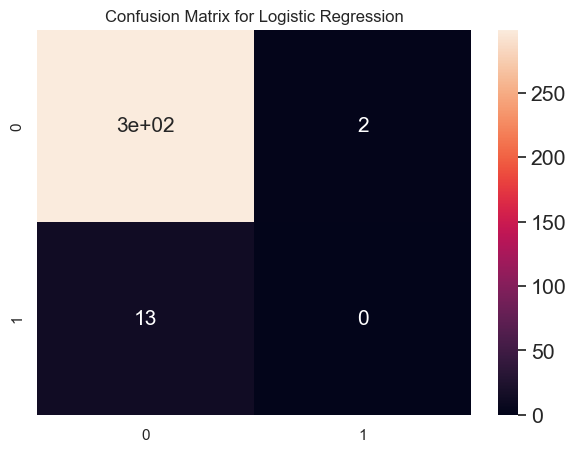

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title('Confusion Matrix for Logistic Regression')
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

In [ ]:
# The Feature Importances in a Model
# https://github.com/sharmaroshan/SECOM-Detecting-Defected-Items/blob/master/SECOM.ipynb

In [ ]:
# Extend your model assessment by taking into account costs for wrongly classified wafers.

In [ ]:
# Findings